**MARKETING CAMPAIGN ANALYSIS REPORT**

> INTRODUCTION


> The purpose of this report is to describe the steps taken to prepare and analyze data sets in the “Bank
Marketing” data in order to predict consumer reactions to marketing campaigns. The data sets contain
information on consumer characteristics, occupational background, education level, communication
network patterns, and response to marketing campaigns.

**TASK 1: DATA MANIPULATION**

> I downloaded the ‘Bank Marketing’ data from Blackboard and loaded it into my working environment.



*Importing necessary libraries*

In [ ]:
# Numerical & visualization libraries
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Predictive classifier libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
# Metrics for model evaluation libraries
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
# Scale features library
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Train and test library
from sklearn.model_selection import train_test_split
from scipy import stats

*Working environment set-up*

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*DESCRIPTIVE ANALYSIS*

In [ ]:
# Defining file paths for the datasets
bank = '/content/drive/MyDrive/Colab Notebooks/python-2/bank.csv'
bank_full = '/content/drive/MyDrive/Colab Notebooks/python-2/bank-full.csv'
bank_additional = '/content/drive/MyDrive/Colab Notebooks/python-2/bank-additional.csv'
bank_additional_full = '/content/drive/MyDrive/Colab Notebooks/python-2/bank-additional-full.csv'
# Displaying first few records of each dataset
bank_df = pd.read_csv(bank, sep=';')
print("Bank Dataset:")
print(bank_df.head())
bank_full_df = pd.read_csv(bank_full, sep=';')
print("\nBank Full Dataset:")
print(bank_full_df.head())
bank_additional_df = pd.read_csv(bank_additional, sep=';')
print("\nBank Additional Dataset:")
print(bank_additional_df.head())
bank_additional_full_df = pd.read_csv(bank_additional_full, sep=';')
print("\nBank Additional Full Dataset:")
print(bank_additional_full_df.head())

Bank Dataset:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Bank Full Dataset:
   age           job  marital  education default  balance housing loan  \
0  

*Info description of each dataset:*

In [ ]:
print("Bank Dataset:")
print(bank_df.info())
print("\nBank Full Dataset:")
print(bank_full_df.info())
print("\nBank Additional Dataset:")
print(bank_additional_df.info())
print("\nBank Additional Full Dataset:")
print(bank_additional_full_df.info())

Bank Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None

Bank Full Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entr

- All the datasets had no missing values.
- Datatypes in the datasets were; integers, objects, and  floating-point numbers

*Summary description of each dataset:*

In [ ]:
print("Bank Dataset Description:")
print(bank_df.describe().T)
print("\nBank Full Dataset Description:")
print(bank_full_df.describe().T)
print("\nBank Additional Dataset Description:")
print(bank_additional_df.describe().T)
print("\nBank Additional Full Dataset Description:")
print(bank_additional_full_df.describe().T)

Bank Dataset Description:
           count         mean          std     min    25%    50%     75%  \
age       4521.0    41.170095    10.576211    19.0   33.0   39.0    49.0   
balance   4521.0  1422.657819  3009.638142 -3313.0   69.0  444.0  1480.0   
day       4521.0    15.915284     8.247667     1.0    9.0   16.0    21.0   
duration  4521.0   263.961292   259.856633     4.0  104.0  185.0   329.0   
campaign  4521.0     2.793630     3.109807     1.0    1.0    2.0     3.0   
pdays     4521.0    39.766645   100.121124    -1.0   -1.0   -1.0    -1.0   
previous  4521.0     0.542579     1.693562     0.0    0.0    0.0     0.0   

              max  
age          87.0  
balance   71188.0  
day          31.0  
duration   3025.0  
campaign     50.0  
pdays       871.0  
previous     25.0  

Bank Full Dataset Description:
            count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  

- This output summary gives the total count, average, standard deviation, minimum, first quartile, median, third quartile, and the maximum of each variable in each of the datasets.

*DATA PREPARATION & CLEANING*

>Since all the datasets had some common attributes across like “age”, “job”, and “marital”
among others, then it is necessary to merge the datasets for a comprehensive analysis.

In [ ]:
# Merging datasets
data = pd.concat([bank_df, bank_full_df, bank_additional_df, bank_additional_full_df], ignore_index=True)
# Handling missing values introduced as a result of no matching values in the specified columns due to the merging effect
# For numerical attributes, replace missing value(s) with the mean while for categorical attributes, replace missing values with the most frequent value
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    elif data[column].dtype == 'int64' or data[column].dtype == 'float64':
        data[column].fillna(data[column].mean(), inplace=True)
# Handling outliers using Z-score technique
scores = pd.DataFrame(stats.zscore(data[['balance', 'day']]), columns=['z_score'])
data['outlier'] = scores['z_score'].apply(lambda x: x > 2 or x < -2)
data = data[data['outlier'] == False] # excluding outliers
# Summarizing merged dataset
print("Info description of the merged dataset:")
data.info()
print("\nMerged dataset:")
data

Info description of the merged dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 95039 entries, 0 to 95038
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             95039 non-null  int64  
 1   job             95039 non-null  object 
 2   marital         95039 non-null  object 
 3   education       95039 non-null  object 
 4   default         95039 non-null  object 
 5   balance         95039 non-null  float64
 6   housing         95039 non-null  object 
 7   loan            95039 non-null  object 
 8   contact         95039 non-null  object 
 9   day             95039 non-null  float64
 10  month           95039 non-null  object 
 11  duration        95039 non-null  int64  
 12  campaign        95039 non-null  int64  
 13  pdays           95039 non-null  int64  
 14  previous        95039 non-null  int64  
 15  poutcome        95039 non-null  object 
 16  y               95039 non-null  obje

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outlier
0,30,unemployed,married,primary,no,1787.000000,no,no,cellular,19.000000,...,0,unknown,no,thu,0.082166,93.576032,-40.502282,3.621297,5166.985525,False
1,33,services,married,secondary,no,4789.000000,yes,yes,cellular,11.000000,...,4,failure,no,thu,0.082166,93.576032,-40.502282,3.621297,5166.985525,False
2,35,management,single,tertiary,no,1350.000000,yes,no,cellular,16.000000,...,1,failure,no,thu,0.082166,93.576032,-40.502282,3.621297,5166.985525,False
3,30,management,married,tertiary,no,1476.000000,yes,yes,unknown,3.000000,...,0,unknown,no,thu,0.082166,93.576032,-40.502282,3.621297,5166.985525,False
4,59,blue-collar,married,secondary,no,0.000000,yes,no,unknown,5.000000,...,0,unknown,no,thu,0.082166,93.576032,-40.502282,3.621297,5166.985525,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95034,73,retired,married,professional.course,no,1367.761562,yes,no,cellular,15.816315,...,0,nonexistent,yes,fri,-1.100000,94.767000,-50.800000,1.028000,4963.600000,False
95035,46,blue-collar,married,professional.course,no,1367.761562,no,no,cellular,15.816315,...,0,nonexistent,no,fri,-1.100000,94.767000,-50.800000,1.028000,4963.600000,False
95036,56,retired,married,university.degree,no,1367.761562,yes,no,cellular,15.816315,...,0,nonexistent,no,fri,-1.100000,94.767000,-50.800000,1.028000,4963.600000,False
95037,44,technician,married,professional.course,no,1367.761562,no,no,cellular,15.816315,...,0,nonexistent,yes,fri,-1.100000,94.767000,-50.800000,1.028000,4963.600000,False


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


- Here, I have concatinated the datasets. For the missing values, I filled with the mode value for categorical columns and mean value for the numerical columns. Rows with outliers have been excluded from the dataset.

*Summary statistics of categorical columns:*

In [ ]:
data.describe(exclude = ['int64','float64']).T

,count,unique,top,freq
job,95039,12,blue-collar,20816
marital,95039,4,married,57448
education,95039,11,secondary,25508
default,95039,3,no,84744
housing,95039,3,yes,51440
loan,95039,3,no,79096
contact,95039,3,cellular,60977
month,95039,12,may,30311
poutcome,95039,5,unknown,40664
y,95039,2,no,84138


*Features understanding:*

In [ ]:
# Unique values to identification
{x: len(data[x].unique()) for x in  data.columns}

{'age': 80,
 'job': 12,
 'marital': 4,
 'education': 11,
 'default': 3,
 'balance': 7169,
 'housing': 3,
 'loan': 3,
 'contact': 3,
 'day': 32,
 'month': 12,
 'duration': 1623,
 'campaign': 51,
 'pdays': 563,
 'previous': 41,
 'poutcome': 5,
 'y': 2,
 'day_of_week': 5,
 'emp.var.rate': 11,
 'cons.price.idx': 27,
 'cons.conf.idx': 27,
 'euribor3m': 317,
 'nr.employed': 12,
 'outlier': 1}

- In summary, counting the unique values in each column will help distinguish between categorical and continuous features, understand the nature of the target variable, and assess the overall diversity of features within the dataset. This understanding is crucial for making informed decisions during the data analysis and modeling process. Some columns like 'contact', 'loan', 'default' and 'marital', have a smaller number of unique values thus they might be categorical features. 'balance', 'duration', 'pdays', 'euribor3m' have a larger number of unique values thus they may be continuous values. 'y' has 2 unique values thus a binary classification problem.

Binary classification preparation:

In [ ]:
def converter(y): # "Yes" or "No" to "1" or "0" conversion function
    if y == 'Yes':
        return 1  # 1 as churned
    else:
        return 0  # 0 as not churned
# Applying the function and creating a new column named 'y1'
data['y1'] = data['y'].apply(converter)

- Here, the function takes a binary categorical input ('Yes' or 'No') and converts it to a numerical label ('1' or '0'), where 1 is when the input is 'Yes' and '0' is when the input is 'No'. Results are stored in a new column named 'y1'.

In [ ]:
# Displaying first few rows with the new "y1" column
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome,y,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outlier,y1
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19.0,...,unknown,no,thu,0.082166,93.576032,-40.502282,3.621297,5166.985525,False,0
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,...,failure,no,thu,0.082166,93.576032,-40.502282,3.621297,5166.985525,False,0
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,...,failure,no,thu,0.082166,93.576032,-40.502282,3.621297,5166.985525,False,0
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3.0,...,unknown,no,thu,0.082166,93.576032,-40.502282,3.621297,5166.985525,False,0
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5.0,...,unknown,no,thu,0.082166,93.576032,-40.502282,3.621297,5166.985525,False,0


*Handling duplication:*

In [ ]:
# Checking for duplicates
print("There are {} duplication instances in the dataset" .format(data.duplicated().sum()))
print("\n")

There are 8652 duplication instances in the dataset




In [ ]:
# Removing duplicates
data = data.drop_duplicates()
# Re-checking for duplicates
print("\nThere are {} duplication instances in the dataset" .format(data.duplicated().sum()))


There are 0 duplication instances in the dataset


*EXPLANATORY DATA ANALYSIS*

I. Univariate Analysis

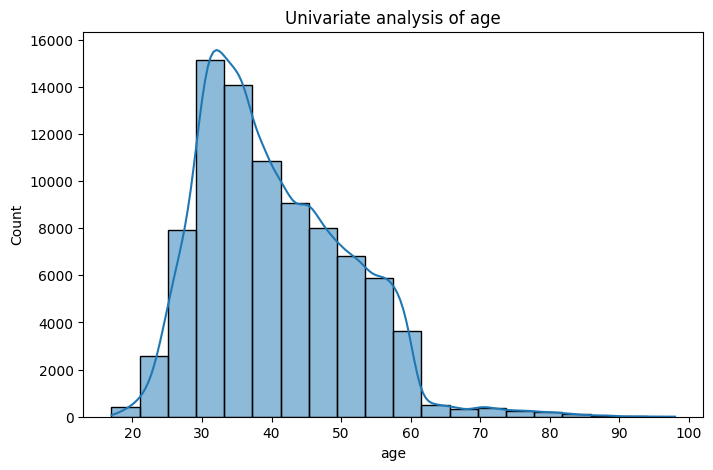

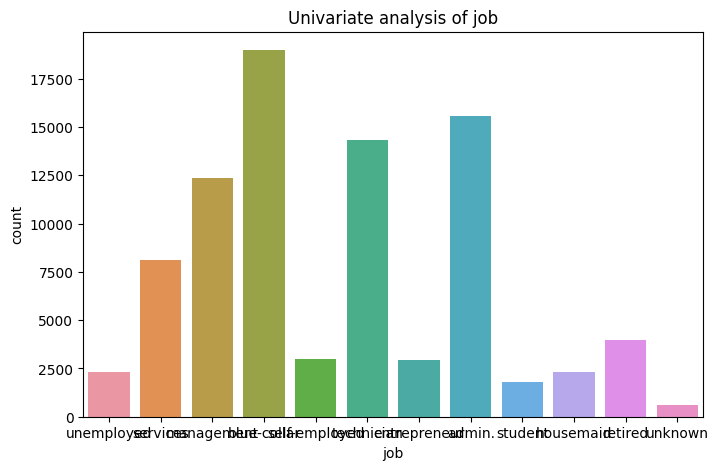

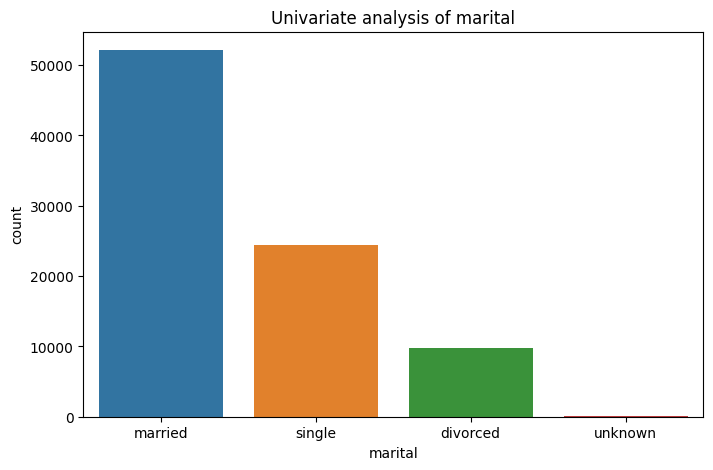

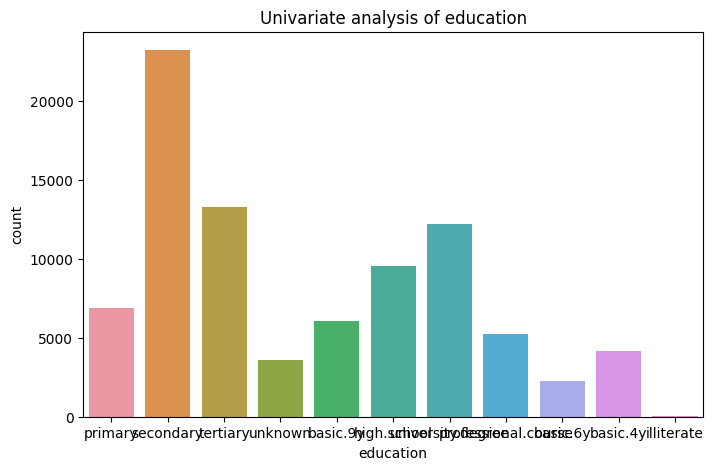

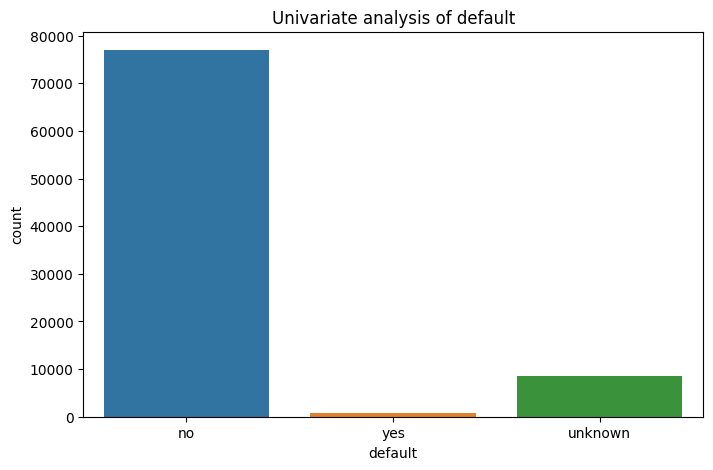

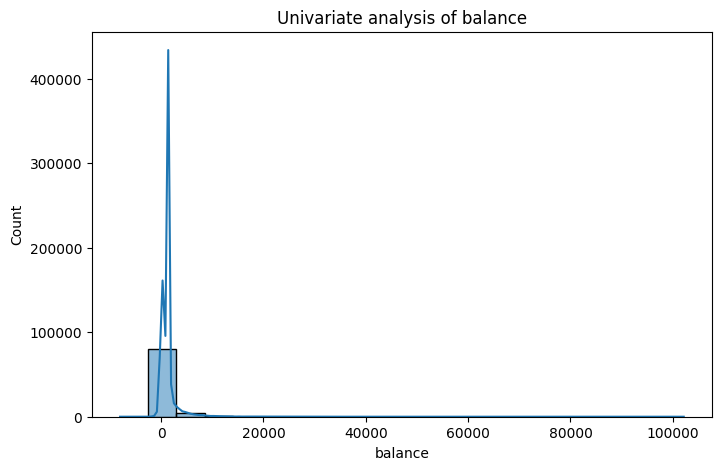

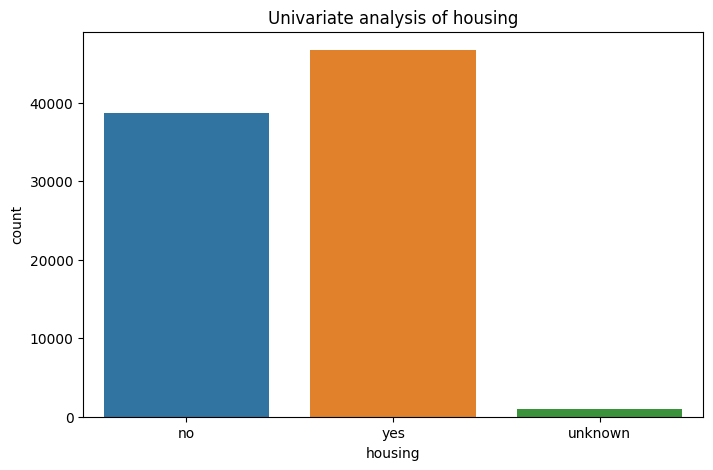

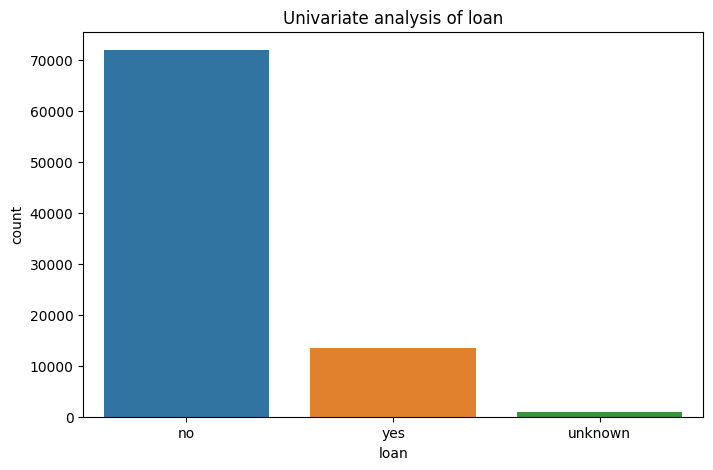

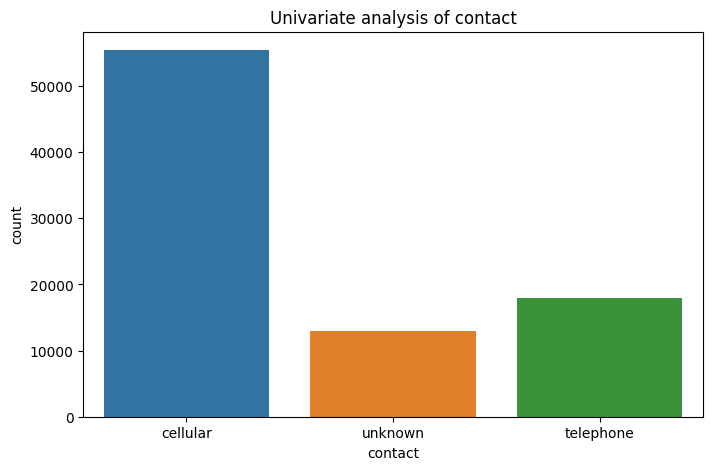

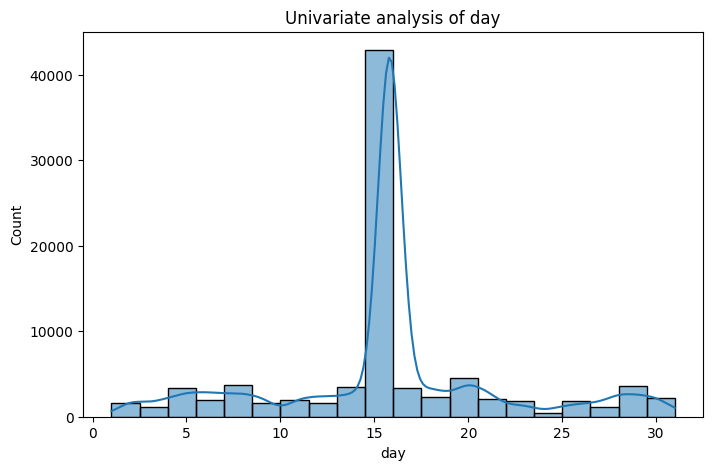

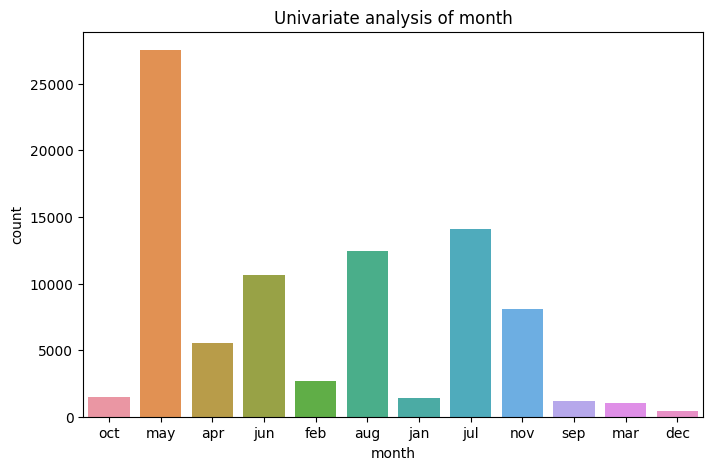

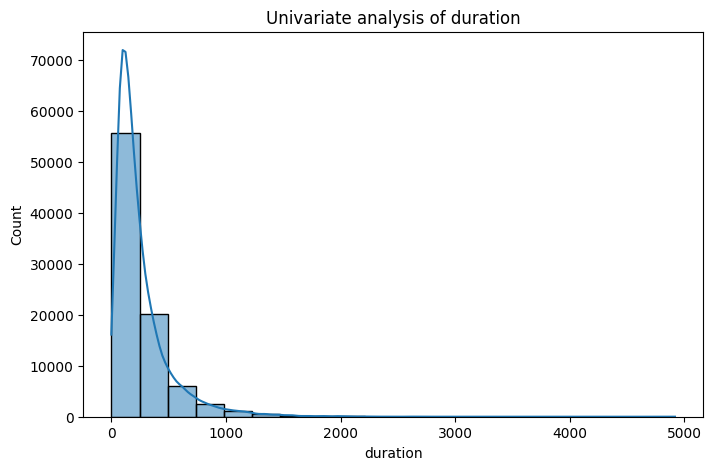

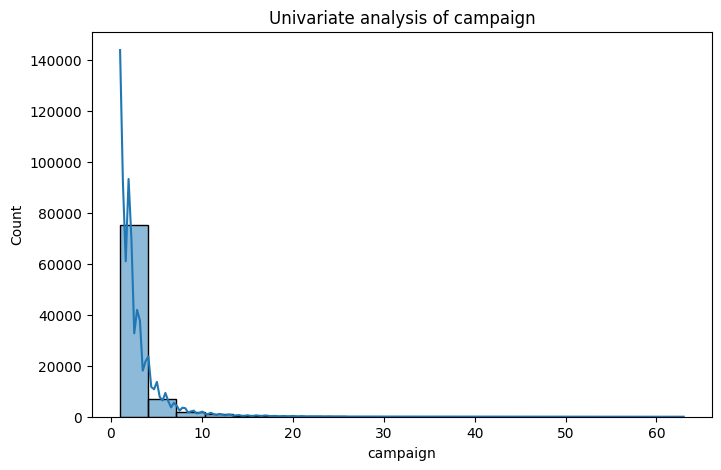

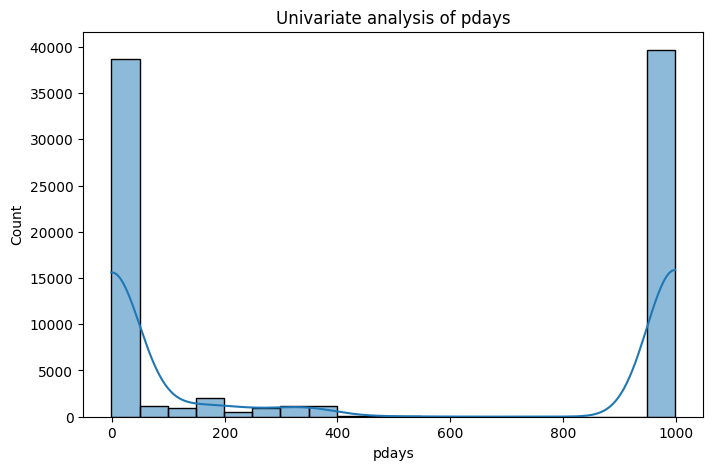

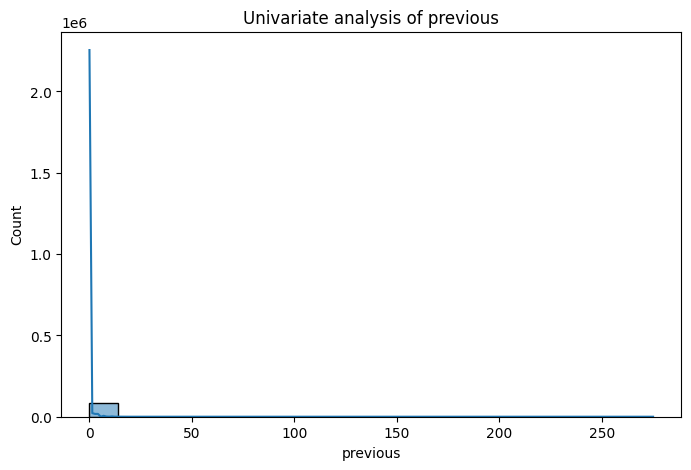

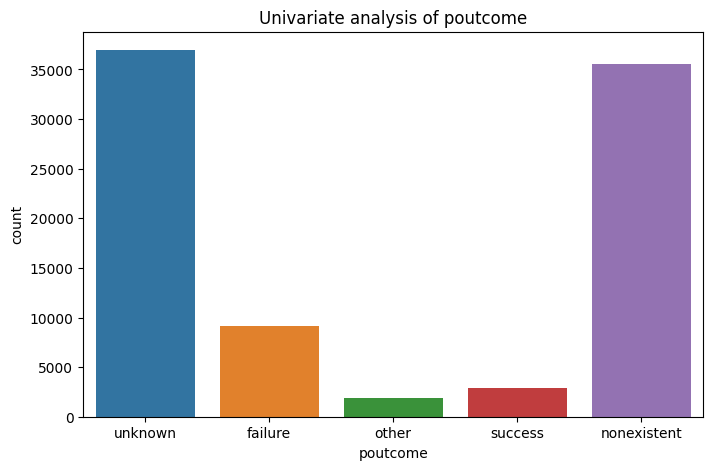

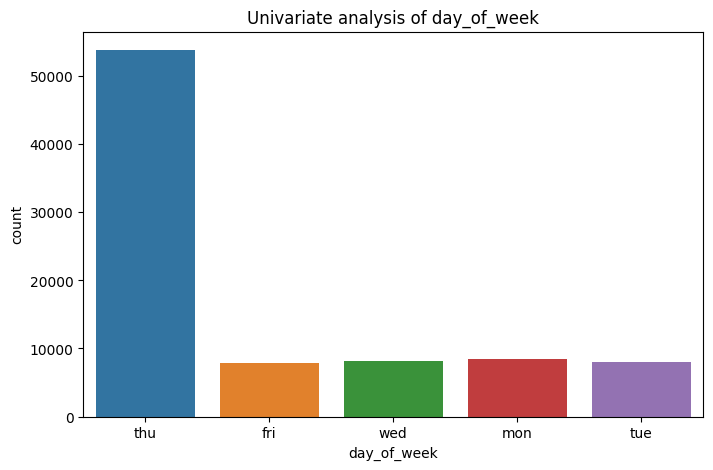

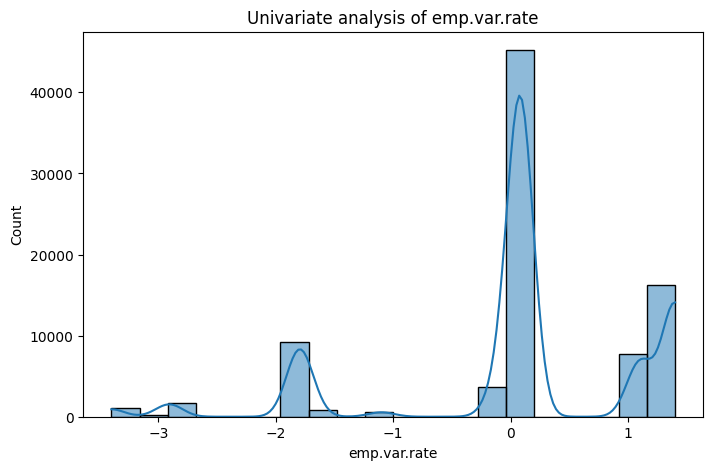

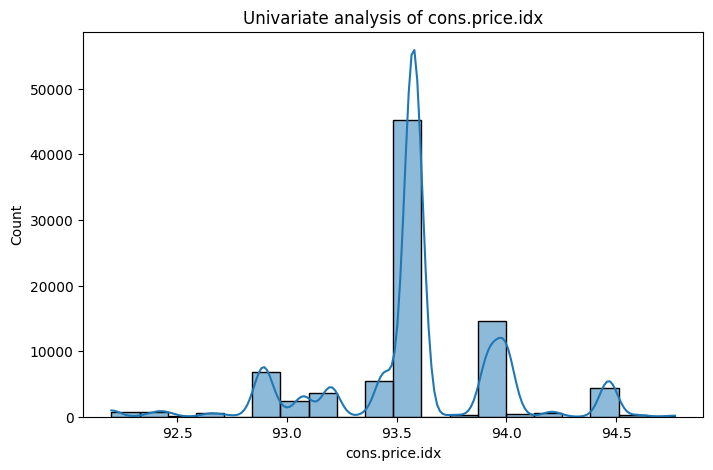

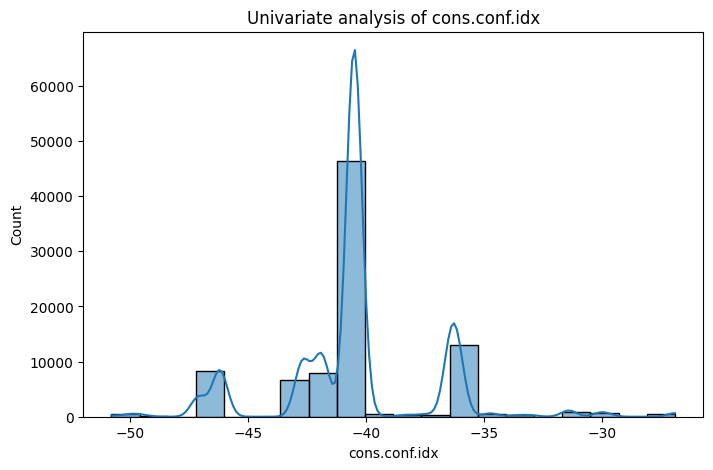

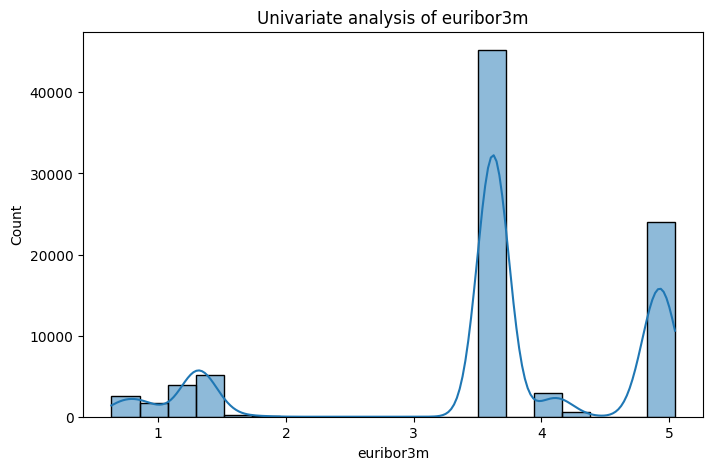

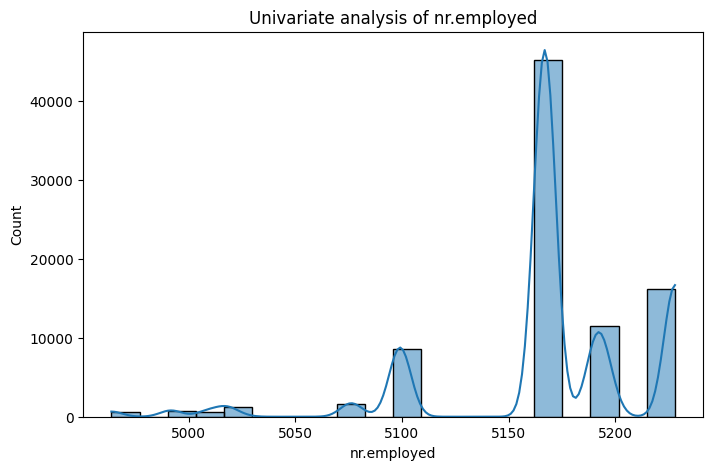

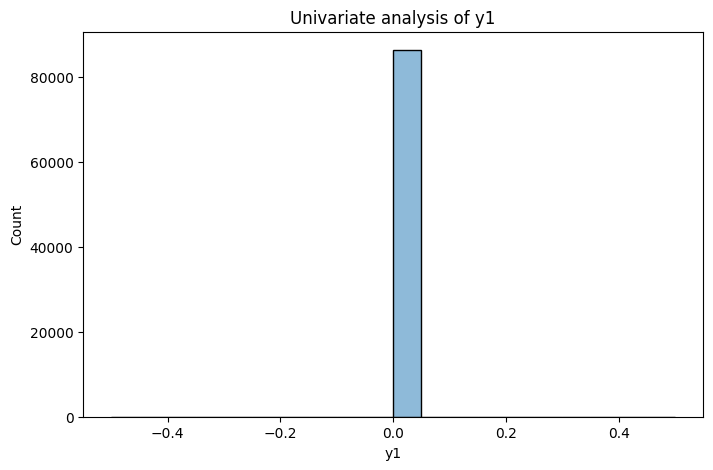

In [ ]:
# Univariate analysis function
def univariate_analysis(data, excluded=None):
    for column in data.columns:
        if excluded and column in excluded:
            # Skip analysis for excluded columns
            continue
        if data[column].dtype == 'object':
            # Plotting bar plots (categorical variables)
            plt.figure(figsize=(8, 5))
            sns.countplot(x=column, data=data)
            plt.title(f'Univariate analysis of {column}')
            plt.show()
        else:
            # Plotting histograms (numerical variables)
            plt.figure(figsize=(8, 5))
            sns.histplot(data[column], bins=20, kde=True)
            plt.title(f'Univariate analysis of {column}')
            plt.show()
# Columns to exclude from analysis
exclude = ['outlier', 'y']
# Performing for all columns excluding specified ones
univariate_analysis(data, excluded=exclude)

Summary:
- Age of 25-60, those married, those who had not defaulted a loan, those with a housing loan, those without a personal loan, the month of may, and cellular communication had the highest count wheraeas there was an average balance of less than 20, 000 euros, duration of less than 2000 seconds, and thursday had the highest count as the other days experienced the same (or almost the same) count.

II. Bivariate Analysis

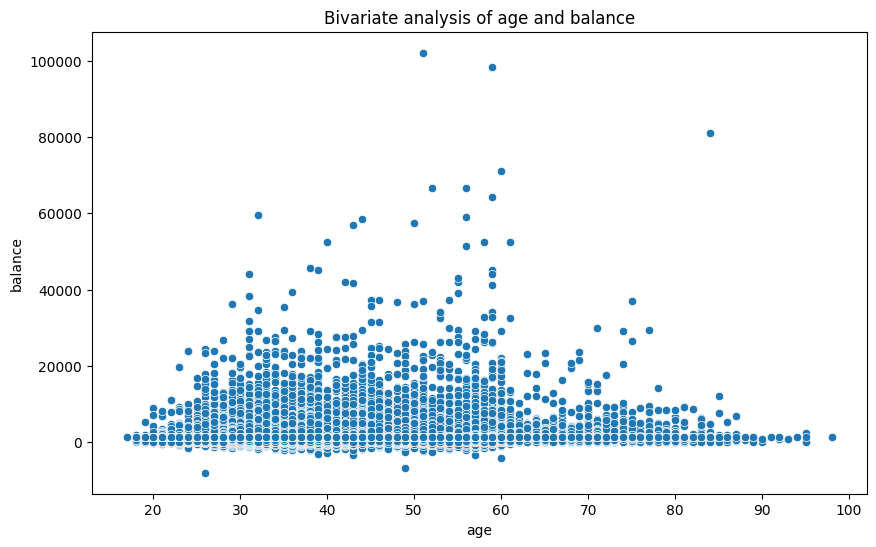

In [ ]:
# Bivariate analysis function
def bivariate_analysis(data, column1, column2):
    if data[column1].dtype == 'object' and data[column2].dtype == 'object':
        # Plotting a grouped bar plot (two categorical variables)
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column1, hue=column2, data=data)
        plt.title(f'Bivariate analysis of {column1} and {column2}')
        plt.show()
    elif data[column1].dtype != 'object' and data[column2].dtype != 'object':
        # Plotting a scatter plot (two numerical variables)
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=column1, y=column2, data=data)
        plt.title(f'Bivariate analysis of {column1} and {column2}')
        plt.show()
    else:
        # Plotting a box plot (one categorical & one numerical variable)
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=column1, y=column2, data=data)
        plt.title(f'Bivariate analysis of {column1} and {column2}')
        plt.show()
# Specifing columns in consideration (age & balance)
bivariate_analysis(data, 'age', 'balance')

Summary:
- From the scatter plot, it appears to show a positive correlation between age and balance meaning that as an individual grows old their balance tends to increase maybe due to more experience, or personal savings amongst. This is a general trend meaning that there is variability most pprobably since there are younger people with high balances maybe even due to inheritance amongst.

III. Multivariate Analysis

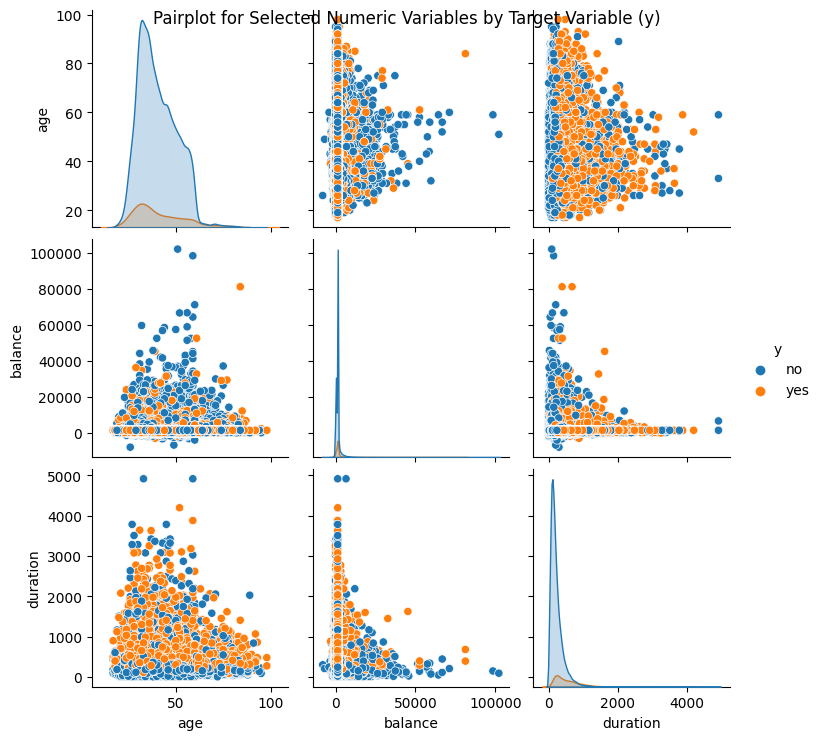

In [ ]:
# Output variable definition
response = 'y'
# Variable selection
selected_columns = ['age', 'balance', 'duration']
# Plotting a pairplot for selected numeric variables (age, balance & duration)
sns.pairplot(data[selected_columns + [response]], hue=response, diag_kind='kde')
plt.suptitle(f'Pairplot for Selected Numeric Variables by Target Variable ({response})')
plt.show()

Summary:
- From the pairplot, it is observed that y has a significant imbalance betwee no and yes, duration has an effect impact on y, while age does not strongly correlate with y

**DATA SAMPLING**

> I established a random seeding to ensure reproducibility and extracted a random sample of 20% for the subsequent analysis.



In [ ]:
# Setting a random seed
random_seed = 42
np.random.seed(random_seed)
# Defining the sampling fraction (20%)
sample_fraction = 0.2
# Randomly sampling 20% from the dataset
data = data.sample(frac=sample_fraction)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome,y,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outlier,y1
86773,32,blue-collar,married,basic.4y,no,1367.761562,yes,no,cellular,15.816315,...,nonexistent,no,mon,-1.800000,92.893000,-46.200000,1.299000,5099.100000,False,0
69192,27,admin.,married,university.degree,no,1367.761562,no,no,cellular,15.816315,...,nonexistent,no,fri,1.400000,93.918000,-42.700000,4.957000,5228.100000,False,0
13759,39,blue-collar,single,primary,no,323.000000,yes,no,unknown,5.000000,...,unknown,no,thu,0.082166,93.576032,-40.502282,3.621297,5166.985525,False,0
15275,36,management,married,tertiary,no,0.000000,no,no,unknown,17.000000,...,unknown,no,thu,0.082166,93.576032,-40.502282,3.621297,5166.985525,False,0
94954,40,technician,married,basic.9y,no,1367.761562,yes,no,cellular,15.816315,...,failure,no,mon,-1.100000,94.767000,-50.800000,1.048000,4963.600000,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85736,29,admin.,married,high.school,no,1367.761562,yes,no,cellular,15.816315,...,nonexistent,yes,thu,-1.800000,92.893000,-46.200000,1.327000,5099.100000,False,0
81725,54,admin.,married,university.degree,no,1367.761562,yes,no,cellular,15.816315,...,nonexistent,yes,mon,-1.800000,92.843000,-50.000000,1.560000,5099.100000,False,0
89318,50,housemaid,married,basic.9y,no,1367.761562,yes,no,cellular,15.816315,...,nonexistent,no,mon,-1.800000,92.893000,-46.200000,1.244000,5099.100000,False,0
15964,52,unemployed,married,primary,no,425.000000,no,no,unknown,19.000000,...,unknown,no,thu,0.082166,93.576032,-40.502282,3.621297,5166.985525,False,0


*DATA PRE-PROCESSING*

Before, data problems such as redundancy have been identified. Next, encoding the data's category features is necessary and also visualizations will help to gain insights into significant predictor features.


In [ ]:
#dropping off some redundant features
data.drop(['outlier'], axis=1,inplace=True)

*Converting categorical columns using one-hot encoding:*

In [ ]:
# Selecting categorical columns
categorical = data.select_dtypes(include=['object']).columns
# One-hot encoding to categorical columns
data = pd.get_dummies(data, columns=categorical, drop_first=True)
# Encoded dataframe
data.head()

,age,balance,day,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_sep,poutcome_nonexistent,poutcome_other,poutcome_success,poutcome_unknown,y_yes,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
86773,32,1367.761562,15.816315,200,2,999,0,-1.800000,92.893000,-46.200000,...,0,1,0,0,0,0,1,0,0,0
69192,27,1367.761562,15.816315,146,1,999,0,1.400000,93.918000,-42.700000,...,0,1,0,0,0,0,0,0,0,0
13759,39,323.000000,5.000000,138,3,-1,0,0.082166,93.576032,-40.502282,...,0,0,0,0,1,0,0,1,0,0
15275,36,0.000000,17.000000,222,3,-1,0,0.082166,93.576032,-40.502282,...,0,0,0,0,1,0,0,1,0,0
94954,40,1367.761562,15.816315,414,2,999,3,-1.100000,94.767000,-50.800000,...,0,0,0,0,0,0,1,0,0,0


Scaling:

In [ ]:
#identifying key featurs from the data set
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data,y),columns=data.columns)
#w Using a random classifier model to identify the importance features
model = RandomForestClassifier()
# Fitting the model
print(model.fit(data, y))
print("\nScaled dataset")
data

RandomForestClassifier()

Scaled dataset


,age,balance,day,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_sep,poutcome_nonexistent,poutcome_other,poutcome_success,poutcome_unknown,y_yes,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.192308,0.105270,0.493877,0.052590,0.018519,1.0,0.000000,0.333333,0.269680,0.192469,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.128205,0.105270,0.493877,0.038319,0.000000,1.0,0.000000,1.000000,0.669135,0.338912,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.282051,0.091882,0.133333,0.036205,0.037037,0.0,0.000000,0.725451,0.535866,0.430867,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.243590,0.087743,0.533333,0.058404,0.037037,0.0,0.000000,0.725451,0.535866,0.430867,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.294872,0.105270,0.493877,0.109144,0.018519,1.0,0.051724,0.479167,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17272,0.153846,0.105270,0.493877,0.210624,0.018519,1.0,0.000000,0.333333,0.269680,0.192469,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
17273,0.474359,0.105270,0.493877,0.109408,0.000000,1.0,0.000000,0.333333,0.250195,0.033473,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
17274,0.423077,0.105270,0.493877,0.003964,0.092593,1.0,0.000000,0.333333,0.269680,0.192469,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17275,0.448718,0.093189,0.600000,0.031977,0.000000,0.0,0.000000,0.725451,0.535866,0.430867,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


*Visualizing key features*

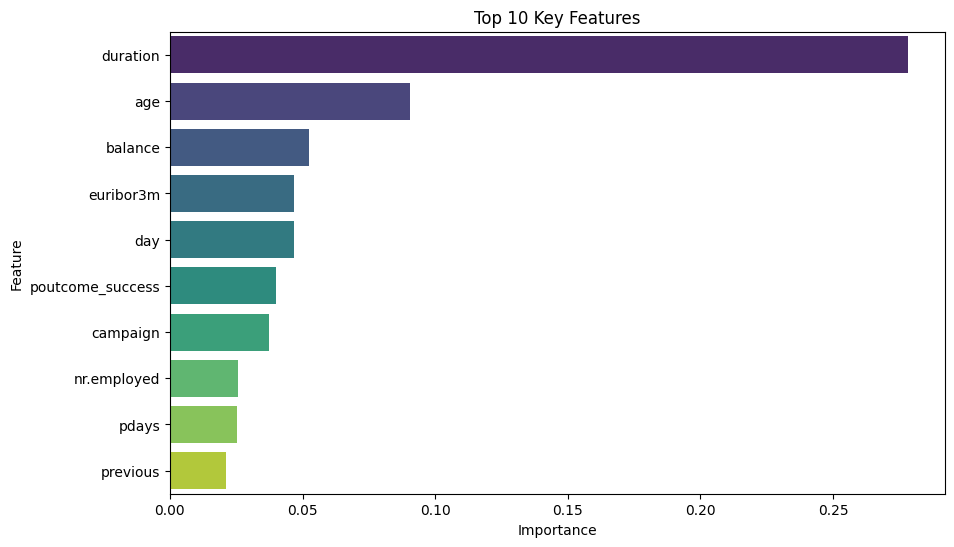

In [ ]:
# Defining target variable
X = data.drop('y_yes', axis=1)
y = data['y_yes']
# Creating classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Random Forest Classifier
# Fitting the model
classifier.fit(X, y)
# Retrieving feature importances
fimportance = classifier.feature_importances_
# Creating a dataFrame to display feature importances
fimportance_df = pd.DataFrame({'Feature': X.columns, 'Importance': fimportance})
fimportance_df = fimportance_df.sort_values(by='Importance', ascending=False)
# Display the top N key features
number = 10  # Change this value based on your preference
top_features = fimportance_df.head(number)
# Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title(f'Top {number} Key Features')
plt.show()

- From the above plot, top ten selected features were duration, age, balance, euribor3m, day poutcome_success, campaign, nr.employed, pdays, and previous respectively.

In summary, I started my data pre-processing by locating and fixing data problems like eliminating unnecessary data, I then concentrated on encoding the dataset's categorical features to improve accuracy and robustness of my analysis. I scaled and then developed a feature importances in order to find relevant predictive features.

**BASE MODEL BUILDING**

> For this phase, I considered using an Isolation Forest and One-Class Support Vector Machine as one-classification algorithms to get a comprehensive
understanding of the problem. Employing different algorithms ensures reliability, robustness and
generalizability of the selected models which results to a better model selection, performance, and
decisions. Before choosing an algorithm to deploy, some of the key considerations were the dataset size,
attributes in the dataset and the goals of this analysis.

*MODEL BUILDING AND TRAINING*

> Importing necessary libraries for this phase:



In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
# Defining the target variable, where 1 indicates 'yes' & 0 indicates 'no'
X = data.drop('y_yes', axis=1)
y = data['y_yes']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*1. Isolation Forest Model*


Evaluation Metrics:
Accuracy: 0.11371527777777778
Precision: 0.10900058445353594
Recall: 0.9638242894056848
F1 Score: 0.19585192964032555
ROC AUC Score: 0.48517053505800695


Confusion Matrix:


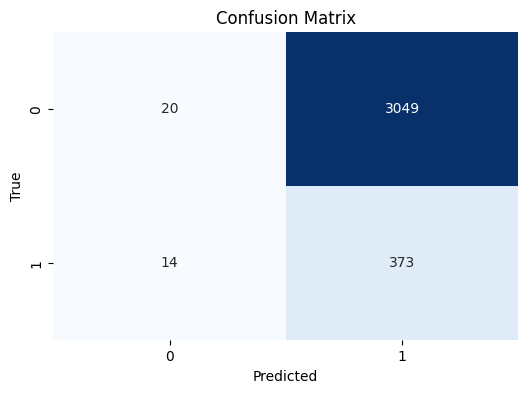

In [ ]:
# Features standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Implementing the model
y_pred_train = isolation_forest.fit_predict(X_train)
y_pred_test = isolation_forest.predict(X_test)
# Converting predictions, where -1 indicates anomalie while 1 indicates normal to binary 0 for anomalies while 1 for normal
y_pred_train_binary = [1 if pred == 1 else 0 for pred in y_pred_train]
y_pred_test_binary = [1 if pred == 1 else 0 for pred in y_pred_test]
# Evaluation
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_test_binary))
print("Precision:", precision_score(y_test, y_pred_test_binary))
print("Recall:", recall_score(y_test, y_pred_test_binary))
print("F1 Score:", f1_score(y_test, y_pred_test_binary))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_test_binary))
print('\n')
print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred_test_binary)
# Visualization of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

*2. One-Class Support Vector Machine*


Evaluation Metrics
Accuracy: 0.8715
Precision: 0.2756
Recall: 0.0904
F1 Score: 0.1362
ROC AUC Score: 0.5302


Confusion Matrix:


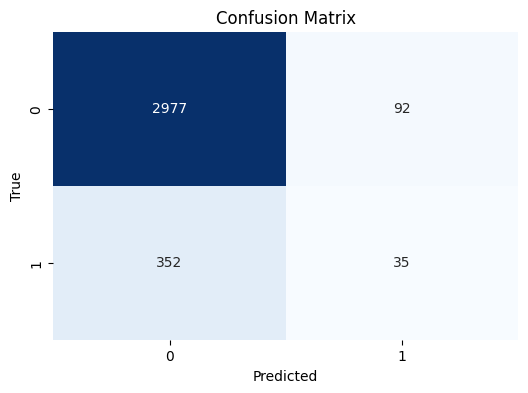

In [ ]:
# Training the One-Class SVM
one_class_svm = OneClassSVM(nu=0.01)
one_class_svm.fit(X_train)
# Predicting on the test set
y_pred = one_class_svm.predict(X_test)
# Convert predictions to binary (1 for anomalies, -1 for normal instances)
y_pred_binary = np.where(y_pred == -1, 1, 0)
# Evaluation
print("\nEvaluation Metrics")
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')
precision = precision_score(y_test, y_pred_binary)
print(f'Precision: {precision:.4f}')
recall = recall_score(y_test, y_pred_binary)
print(f'Recall: {recall:.4f}')
f1 = f1_score(y_test, y_pred_binary)
print(f'F1 Score: {f1:.4f}')
roc_auc = roc_auc_score(y_test, y_pred_binary)
print(f'ROC AUC Score: {roc_auc:.4f}')
print('\n')
print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred_binary)
# Visualization of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Model Evaluation
- In summary, both models have some trouble spotting unusual occurrences in the data. The One-Class SVM performs better overall in terms of getting things right, but it still faces difficulties in finding a good balance between being precise and catching all the unusual cases. Both models could benefit from closer examination and tweaking their settings to do a better job.

*Do the job backgrounds and education levels affect customers’ responding rate significantly?*

Evaluation:
Recall: 0.9638242894056848


Confusion Matrix:
[[2330  739]
 [ 300   87]]


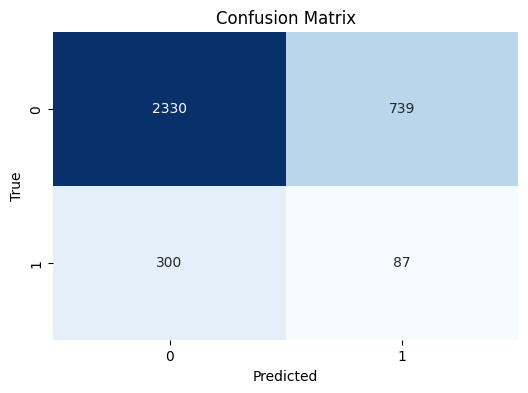

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
# Features selection
X = data[['job_blue-collar', 'job_entrepreneur','job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_primary', 'education_professional.course', 'education_secondary',
       'education_tertiary', 'education_university.degree', 'education_unknown']]
y = data['y_yes']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Training the One-Class SVM
one_class_svm = OneClassSVM(nu=0.01)  # You can adjust the 'nu' parameter based on your dataset
one_class_svm.fit(X_train)
# Predicting on the test set
y_pred = one_class_svm.predict(X_test)
# Converting predictions to binary (1 for anomalies, 0 for normal instances)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]
# Evaluation
print("Evaluation:")
print("Recall:", recall_score(y_test, y_pred_test_binary))
print('\n')
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
# Visualization of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#####FINDINGS:
```- There is success in identifying customers who actually respond based on their job background and education level, due to the high recall score (true positive rate). This is an indication that job backgrounds and education levels affect customers responding rate. Therefore, job backgrounds and education levels affect customers responding rate significantly```

*Is there a relationship between customers' response rates and the contact communication
type?*


Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      3069
         1.0       0.33      0.03      0.05       387

    accuracy                           0.89      3456
   macro avg       0.61      0.51      0.49      3456
weighted avg       0.83      0.89      0.84      3456





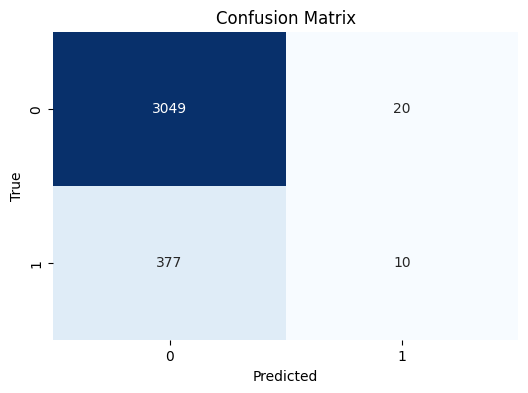

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, classification_report

# Features selection
X = data[['contact_telephone', 'contact_unknown', 'age']]  # relevant features
y = data['y_yes'] # target feature
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Trainning the One-Class SVM
one_class_svm = OneClassSVM(nu=0.01)
one_class_svm.fit(X_train)
# Predicting on the test set
y_pred = one_class_svm.predict(X_test)
# Converting predictions to binary (1 for anomalies, 0 for normal instances)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]
# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)
print('\nClassification Report:')
print(classification_rep)
print('\n')
# Visualization of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#####FINDINGS:
```- Results suggest that there is struggle to accurately predict when customers response based on the contact communication type but there is a relationship betwen the two but the relationship is not the same across all the age groups```
```

###INTERESTING INSIGHTS FROM THE ANALYSIS
Based on the analysis, two interesting insights I can add are:

> 1. Examining the Function of the Economy
- Gaining insight into consumer behavior in relation to economic indicators such as 'euribor3m' and
'emp.var.rate' is possible through further investigation. It's similar to having a sneak peak into how the
overall state of the economy could affect their choice of financial goods. Examining this perspective may
reveal some fascinating links between changes in the economy and consumer behavior.


> 2. Recognizing Trends Over Time
- Analyzing response rates over various time periods—months, days of the week, or even the length of
marketing campaigns—is another fascinating approach. Imagine your data through a time-traveling lens.
Determining when clients are more receptive may provide information on the tides of their decisionmaking. You may come across tendencies associated with particular seasons, events, or outside factors.

####REFERENCE LIST.

> Python Libraries:
- Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment, version 3.4.3. Retrieved from
[https://matplotlib.org/stable/index.html](https://matplotlib.org/stable/index.html)
- McKinney, W. (2018). Python for Data Analysis.
[PDF](http://www.cin.ufpe.br/~embat/Python%20for%20Data%20Analysis.pdf)
- Python Software Foundation. (2022). Python Language Reference, Version 3.10. Retrieved from
[https://docs.python.org/3/reference/](https://docs.python.org/3/reference/)
- Seaborn Development Team. (2021). seaborn: statistical data visualization, version 0.11.2. Retrieved from
[https://seaborn.pydata.org/](https://seaborn.pydata.org/)


